# HW2: Machine Learning for Regrassion Tasks

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [15]:
# Keep only the following columns
df = df[["engine_displacement", "horsepower", "vehicle_weight", "model_year", "fuel_efficiency_mpg"]]

df.sample(5, random_state=42)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


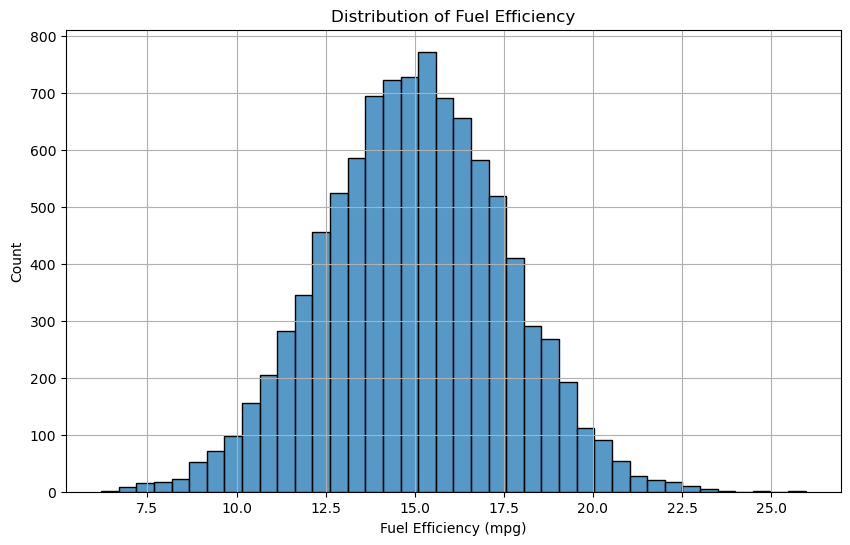

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df.fuel_efficiency_mpg, bins=40, ax=ax)
ax.set(xlabel="Fuel Efficiency (mpg)", ylabel="Count", title="Distribution of Fuel Efficiency")
ax.grid()
plt.show()

In [12]:
# Get statistics of the dataframe
df["fuel_efficiency_mpg"].describe()

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

### Question 1: Find column with missing values

In [22]:
df.isnull().sum().sort_values(ascending=False)

horsepower             708
engine_displacement      0
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2: Find the median value of the horsepower 

In [14]:
horsepower_median = df.horsepower.median()
print("The 50% value of the horse power is", horsepower_median)

The 50% value of the horse power is 149.0


In [24]:
# Split the data into train/val/test

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n == (n_train + n_test + n_val)

True

In [25]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train : n_train + n_val]].copy()
df_test = df.iloc[idx[n_train + n_val :]].copy()

### Question 3: Find the RMSE value

In [ ]:
def train_linear_regression(X, y):

    # Add a bias term (column of ones) to the feature matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


def cal_rmse(y_true, y_pred):
    """
    Calculates the Root Mean Squared Error.
    """
    error = y_true - y_pred
    mse = (error**2).mean()
    return np.sqrt(mse)


In [28]:
target = "fuel_efficiency_mpg"
features = df.columns[df.columns != target].tolist()

print("Features:", features)

Features: ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']


In [36]:
def run_linear_regression(df_train, df_val, features, target, fillna_strategy="mean"):
    if fillna_strategy == "mean":
        X_train = df_train[features].fillna(df_train[features].mean()).to_numpy()
        X_val = df_val[features].fillna(df_train[features].mean()).to_numpy()
    elif fillna_strategy == "zero":
        X_train = df_train[features].fillna(0).to_numpy()
        X_val = df_val[features].fillna(0).to_numpy()
    else:
        raise ValueError("Invalid fillna_strategy. Use 'mean' or 'zero'.")

    y_train = df_train[target].to_numpy()
    y_val = df_val[target].to_numpy()

    w, coef = train_linear_regression(X_train, y_train)

    # Make predictions on the validation set
    y_pred = w + X_val.dot(coef)

    # Calculate RMSE
    rmse = np.round(cal_rmse(y_val, y_pred), 2)
    print(f"RMSE ({fillna_strategy}):", rmse)
    return rmse

In [38]:
# Option 1st: Fill missing values with 0
rmse_zero = run_linear_regression(df_train, df_val, features, target, fillna_strategy="zero")

RMSE (zero): 0.52


In [37]:
# Option 2nd: Fill missing values with the mean
rmse_mean = run_linear_regression(df_train, df_val, features, target, fillna_strategy="mean")

RMSE (mean): 0.46


### Question 4: Train Regularized linear regression

In [39]:
def train_linear_regression_reg(X, y, r=0.0):

    # Add a bias term (column of ones)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    reg = r * np.eye(XTX.shape[0])

    # Set the first element to 0 to not regularize the bias term
    # reg[0, 0] = 0

    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]



In [ ]:
def run_reg_linear_regression(df_train, df_val, features, target, r):
    X_train = df_train[features].fillna(0).to_numpy()
    X_val = df_val[features].fillna(0).to_numpy()
    y_train = df_train[target].to_numpy()
    y_val = df_val[target].to_numpy()

    w, coef = train_linear_regression_reg(X_train, y_train, r=r)

    # Make predictions on the validation set
    y_pred = w + X_val.dot(coef)

    # Calculate RMSE
    rmse = np.round(cal_rmse(y_val, y_pred), 2)
    print(f"RMSE (r={r}):", rmse)
    return rmse

RMSE (r=0): 0.52
RMSE (r=0.01): 0.52
RMSE (r=0.1): 0.52
RMSE (r=1): 0.52
RMSE (r=5): 0.52
RMSE (r=10): 0.52
RMSE (r=100): 0.52


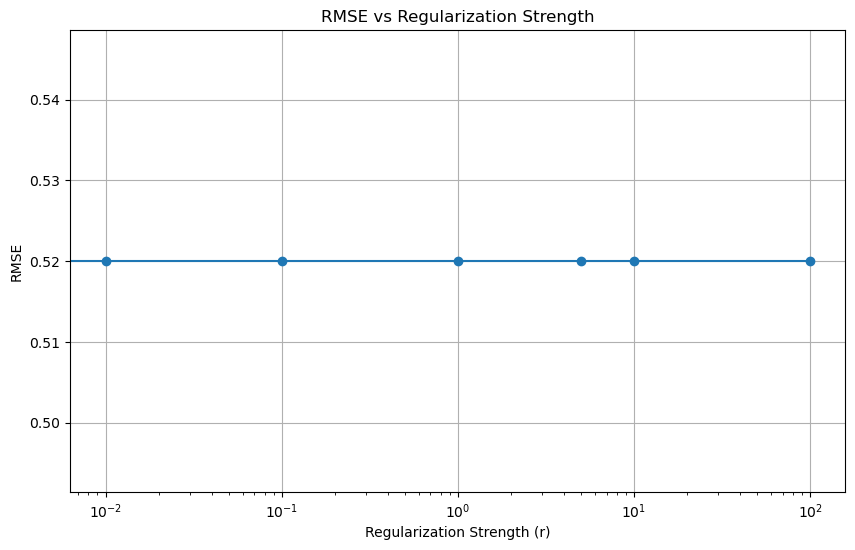

In [47]:
r = [0, 0.01, 0.1, 1, 5, 10, 100]
rmses = [ run_reg_linear_regression(df_train, df_val, features, target, reg) for reg in r ]


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(r, rmses, marker='o')
ax.set(xlabel="Regularization Strength (r)", ylabel="RMSE", title="RMSE vs Regularization Strength")
ax.set_xscale('log')
ax.grid()
plt.show()

In [ ]:
### Question 5: How seeds affect the results

In [51]:
seeds = np.arange(0, 10, 1)

def split_dataset(df, seed, val_size=0.2, test_size=0.2):
    n = len(df)
    n_val = int(n * val_size)
    n_test = int(n * test_size)
    n_train = n - n_val - n_test

    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train : n_train + n_val]].copy()
    df_test = df.iloc[idx[n_train + n_val :]].copy()
    
    return df_train, df_val, df_test

def run_linear_regression(df_train, df_val, features, target, fillna_strategy="mean"):
    if fillna_strategy == "mean":
        X_train = df_train[features].fillna(df_train[features].mean()).to_numpy()
        X_val = df_val[features].fillna(df_train[features].mean()).to_numpy()
    elif fillna_strategy == "zero":
        X_train = df_train[features].fillna(0).to_numpy()
        X_val = df_val[features].fillna(0).to_numpy()
    else:
        raise ValueError("Invalid fillna_strategy. Use 'mean' or 'zero'.")

    y_train = df_train[target].to_numpy()
    y_val = df_val[target].to_numpy()

    w, coef = train_linear_regression(X_train, y_train)

    # Make predictions on the validation set
    y_pred = w + X_val.dot(coef)

    # Calculate RMSE
    rmse = np.round(cal_rmse(y_val, y_pred), 3)
    print(f"RMSE ({fillna_strategy}):", rmse)
    return rmse

def run_question_5(df, seeds, features, target, fillna_strategy="zero"):
    results = []
    for seed in seeds:
        df_train, df_val, df_test = split_dataset(df, seed)
        rmse = run_linear_regression(df_train, df_val, features, target, fillna_strategy=fillna_strategy)
        results.append((seed, rmse))
    
    return pd.DataFrame(results, columns=["seed", "rmse"])
    

In [54]:
df_rmse = run_question_5(df, seeds, features, target, fillna_strategy="zero")

RMSE (zero): 0.521
RMSE (zero): 0.521
RMSE (zero): 0.523
RMSE (zero): 0.516
RMSE (zero): 0.511
RMSE (zero): 0.528
RMSE (zero): 0.531
RMSE (zero): 0.509
RMSE (zero): 0.515
RMSE (zero): 0.513


In [55]:
print("STD of RMSEs:", np.round(df_rmse.rmse.std(), 5))

STD of RMSEs: 0.00725


In [ ]:
### Question 6: Find the test RMSE

In [ ]:
def run_reg_linear_regression(df_train, df_test, features, target, r):
    X_train = df_train[features].fillna(0).to_numpy()
    X_test = df_test[features].fillna(0).to_numpy()
    y_train = df_train[target].to_numpy()
    y_test = df_test[target].to_numpy()

    w, coef = train_linear_regression_reg(X_train, y_train, r=r)

    # Make predictions on the test set
    y_pred = w + X_test.dot(coef)

    # Calculate RMSE
    rmse = np.round(cal_rmse(y_test, y_pred), 3)
    print(f"Test RMSE (r={r}):", rmse)
    return rmse

def run_6th_question(df, features, target, seed=9, r=0.001):
    
    df_train, df_val, df_test = split_dataset(df, seed)
    
    # Combine train and validation sets
    df_train_val = pd.concat([df_train, df_val]).reset_index(drop=True)
    
    # Train the model on the combined set
    rmse = run_reg_linear_regression(df_train_val, df_test, features, target, r=r)
    
    return rmse

In [62]:
run_6th_question(df, features, target, seed=9, r=0.001)

Test RMSE (r=0.001): 0.52


np.float64(0.52)